# Load the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.impute import SimpleImputer
from sklearn.manifold import MDS

# Data

Load the data

In [7]:
OTU_data = pd.read_csv("GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv")

Data Cleaning: Drop or impute missing values. Exclude non-numeric columns from median calculation

In [8]:
OTU_data_numeric = OTU_data.select_dtypes(include=[np.number])
OTU_data[OTU_data_numeric.columns] = OTU_data_numeric.fillna(OTU_data_numeric.median())

Additional step to ensure no NaN values remain

In [9]:
imputer = SimpleImputer(strategy='median')
OTU_data_numeric = pd.DataFrame(imputer.fit_transform(OTU_data_numeric), columns=OTU_data_numeric.columns, index=OTU_data.index)

Calculate the Shannon index, meassuring the diversity inside a sample.

In [10]:
def shannon_index(row):
    return entropy(row[row > 0])

shannon_diversity = OTU_data_numeric.apply(shannon_index, axis=1)

## Add and plot the alpha diversity

C:\Users\pablo\AppData\Local\Temp\ipykernel_11984\2284432258.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  OTU_data['Shannon Diversity'] = shannon_diversity


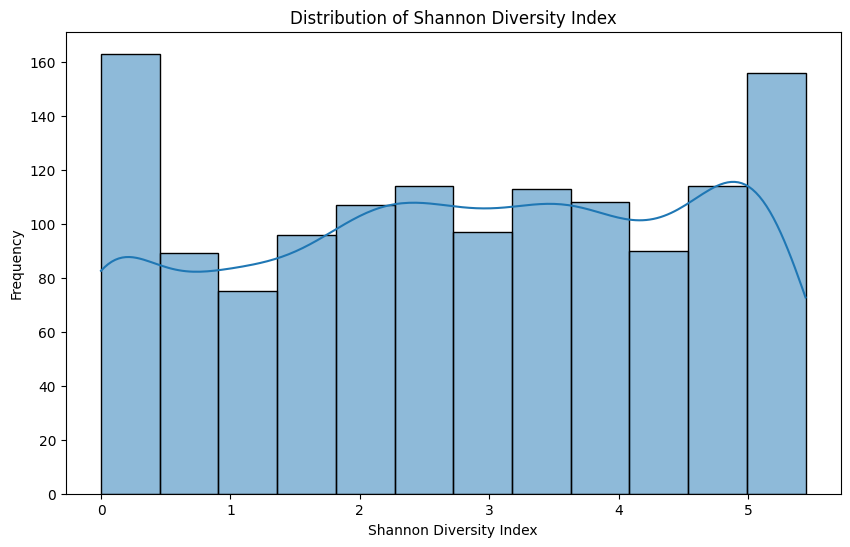

In [11]:
# Add diversity values to OTU data for analysis
OTU_data['Shannon Diversity'] = shannon_diversity

# Plotting the distribution of alpha diversity
plt.figure(figsize=(10, 6))
sns.histplot(shannon_diversity, kde=True)
plt.title("Distribution of Shannon Diversity Index")
plt.xlabel("Shannon Diversity Index")
plt.ylabel("Frequency")
plt.show()

Axes:
- X-axis (Shannon Diversity Index): Represents the values of the Shannon diversity index, which measures diversity within a sample (i.e., the number of different OTUs and their abundance).
- Y-axis (Frequency): Represents how many times each Shannon index value occurs in the dataset (frequency).

Interpretation:

- There are several peaks, with the highest frequencies around 0 and 5. This indicates that some samples have very low diversity (close to 0), meaning that these samples are dominated by just a few microbial types, whereas others have higher diversity (close to 5).
- The high frequency at 0 suggests many samples with low microbial diversity, possibly indicating less complex microbial communities in those cases.
- The distribution is multimodal (multiple peaks), which could mean that there are different types of microbial communities among the samples. This may represent differences in the environment of the samples or in the health status of individuals.

## Calculate the Beta Diversity: between-sample diversity.

Use Bray-Curtis distance to measure beta diversity

In [12]:
bray_curtis_distances = pairwise_distances(OTU_data_numeric, metric='braycurtis')

# Ensure no NaN values in Bray-Curtis distance matrix
bray_curtis_distances = np.nan_to_num(bray_curtis_distances)

# Perform MDS 

In [13]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pcoa_results = mds.fit_transform(bray_curtis_distances)

Pot MDS results

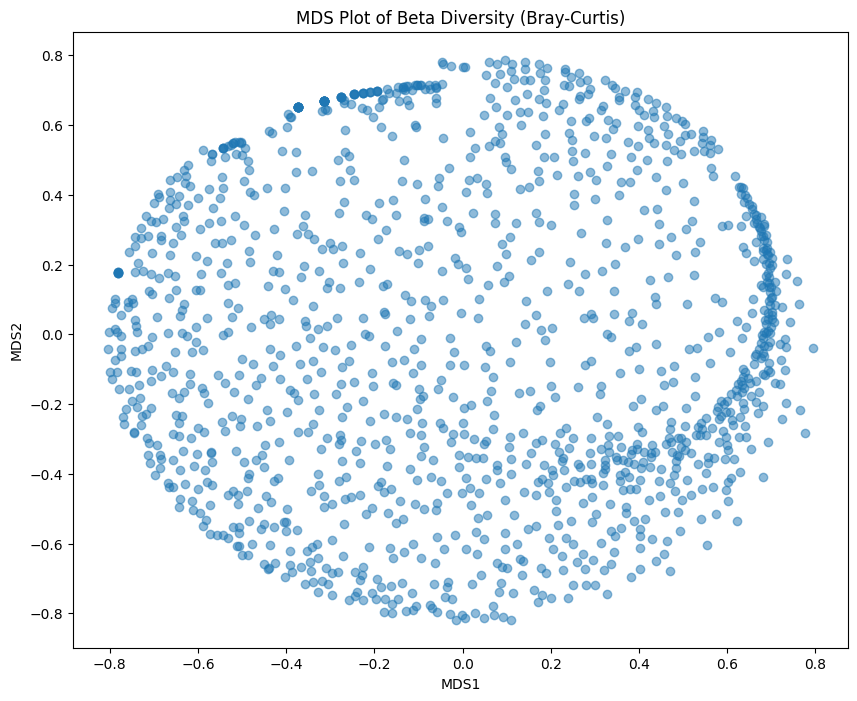

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pcoa_results[:, 0], pcoa_results[:, 1], alpha=0.5)
ax.set_xlabel("MDS1")
ax.set_ylabel("MDS2")
ax.set_title("MDS Plot of Beta Diversity (Bray-Curtis)")
plt.show()

Axes:

- MDS1 and MDS2: Represent the two main dimensions into which the samples are projected. These are abstract axes showing how the samples group together based on the similarity of their microbial profiles.

Interpretation: 

- Each point on the plot represents a sample, and the position of each point reflects its similarity to other samples in terms of microbial composition.
- Clusters: The points seem to have a somewhat circular or elliptical distribution. This suggests that the samples tend to cluster around certain central points, indicating some similarity within the dataset.
- Points that are close together indicate samples that have similar microbial communities, while distant points indicate samples that are quite different from each other.
- The overall dispersed and circular distribution suggests a high diversity between samples in terms of composition, but without clear separation into distinct clusters or categories.

Summary statistics for Shannon diversity

In [15]:
print("Summary Statistics for Shannon Diversity Index:")
print(shannon_diversity.describe())

Summary Statistics for Shannon Diversity Index:
count    1322.000000
mean        2.750324
std         1.700016
min         0.000000
25%         1.386294
50%         2.815333
75%         4.240885
max         5.445523
dtype: float64
